### Explore Bike Share Data

For this project, your goal is to ask and answer three questions about the available bikeshare data from Washington, Chicago, and New York.  This notebook can be submitted directly through the workspace when you are confident in your results.

You will be graded against the project [Rubric](https://review.udacity.com/#!/rubrics/2508/view) by a mentor after you have submitted.  To get you started, you can use the template below, but feel free to be creative in your solutions!

In [1]:
ny = read.csv('new_york_city.csv')
wash = read.csv('washington.csv')
chi = read.csv('chicago.csv')

In [2]:
head(ny)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
5688089,2017-06-11 14:55:05,2017-06-11 15:08:21,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,Male,1998
4096714,2017-05-11 15:30:11,2017-05-11 15:41:43,692,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,Male,1981
2173887,2017-03-29 13:26:26,2017-03-29 13:48:31,1325,1 Pl & Clinton St,Henry St & Degraw St,Subscriber,Male,1987
3945638,2017-05-08 19:47:18,2017-05-08 19:59:01,703,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber,Female,1986
6208972,2017-06-21 07:49:16,2017-06-21 07:54:46,329,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber,Male,1992
1285652,2017-02-22 18:55:24,2017-02-22 19:12:03,998,State St & Smith St,Bond St & Fulton St,Subscriber,Male,1986


In [3]:
head(wash)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type
1621326,2017-06-21 08:36:34,2017-06-21 08:44:43,489.066,14th & Belmont St NW,15th & K St NW,Subscriber
482740,2017-03-11 10:40:00,2017-03-11 10:46:00,402.549,Yuma St & Tenley Circle NW,Connecticut Ave & Yuma St NW,Subscriber
1330037,2017-05-30 01:02:59,2017-05-30 01:13:37,637.251,17th St & Massachusetts Ave NW,5th & K St NW,Subscriber
665458,2017-04-02 07:48:35,2017-04-02 08:19:03,1827.341,Constitution Ave & 2nd St NW/DOL,M St & Pennsylvania Ave NW,Customer
1481135,2017-06-10 08:36:28,2017-06-10 09:02:17,1549.427,Henry Bacon Dr & Lincoln Memorial Circle NW,Maine Ave & 7th St SW,Subscriber
1148202,2017-05-14 07:18:18,2017-05-14 07:24:56,398.000,1st & K St SE,Eastern Market Metro / Pennsylvania Ave & 7th St SE,Subscriber


In [4]:
head(chi)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
1423854,2017-06-23 15:09:32,2017-06-23 15:14:53,321,Wood St & Hubbard St,Damen Ave & Chicago Ave,Subscriber,Male,1992
955915,2017-05-25 18:19:03,2017-05-25 18:45:53,1610,Theater on the Lake,Sheffield Ave & Waveland Ave,Subscriber,Female,1992
9031,2017-01-04 08:27:49,2017-01-04 08:34:45,416,May St & Taylor St,Wood St & Taylor St,Subscriber,Male,1981
304487,2017-03-06 13:49:38,2017-03-06 13:55:28,350,Christiana Ave & Lawrence Ave,St. Louis Ave & Balmoral Ave,Subscriber,Male,1986
45207,2017-01-17 14:53:07,2017-01-17 15:02:01,534,Clark St & Randolph St,Desplaines St & Jackson Blvd,Subscriber,Male,1975
1473887,2017-06-26 09:01:20,2017-06-26 09:11:06,586,Clinton St & Washington Blvd,Canal St & Taylor St,Subscriber,Male,1990


In [5]:
str(wash)

'data.frame':	89051 obs. of  7 variables:
 $ X            : int  1621326 482740 1330037 665458 1481135 1148202 1594275 1601832 574182 327058 ...
 $ Start.Time   : Factor w/ 81223 levels "","2017-01-01 00:11:00",..: 74753 19510 59964 26708 67716 50891 73381 73775 23142 13333 ...
 $ End.Time     : Factor w/ 81217 levels "","2017-01-01 00:14:00",..: 74744 19473 59981 26732 67753 50918 73397 73775 23114 13350 ...
 $ Trip.Duration: num  489 403 637 1827 1549 ...
 $ Start.Station: Factor w/ 478 levels "","10th & E St NW",..: 27 478 66 221 278 84 368 82 71 60 ...
 $ End.Station  : Factor w/ 479 levels "","10th & E St NW",..: 47 219 144 312 315 239 162 376 51 308 ...
 $ User.Type    : Factor w/ 3 levels "","Customer",..: 3 3 3 2 3 3 3 3 3 3 ...


In [6]:
#add gender and birth.year columns to the Washington csv
Gender <- c(rep(" ", 89051))
Birth.Year <- c(rep(" ", 89051))

In [7]:
wash <- cbind(wash, Gender, Birth.Year)

In [8]:
#create new column for city on each dataset
ny$city <- "New York"
chi$city <- "Chicago"
wash$city <- "Washington"

In [9]:
#merge all datasets into one
cities <- rbind(chi, ny, wash)

### Question 1


**What are the counts for each user type?**

In [10]:
#Counts of user type by city
by(cities$User.Type, cities$city, summary)

cities$city: Chicago
             Customer Subscriber 
         1       1746       6883 
------------------------------------------------------------ 
cities$city: New York
             Customer Subscriber 
       119       5558      49093 
------------------------------------------------------------ 
cities$city: Washington
             Customer Subscriber 
         1      23450      65600 

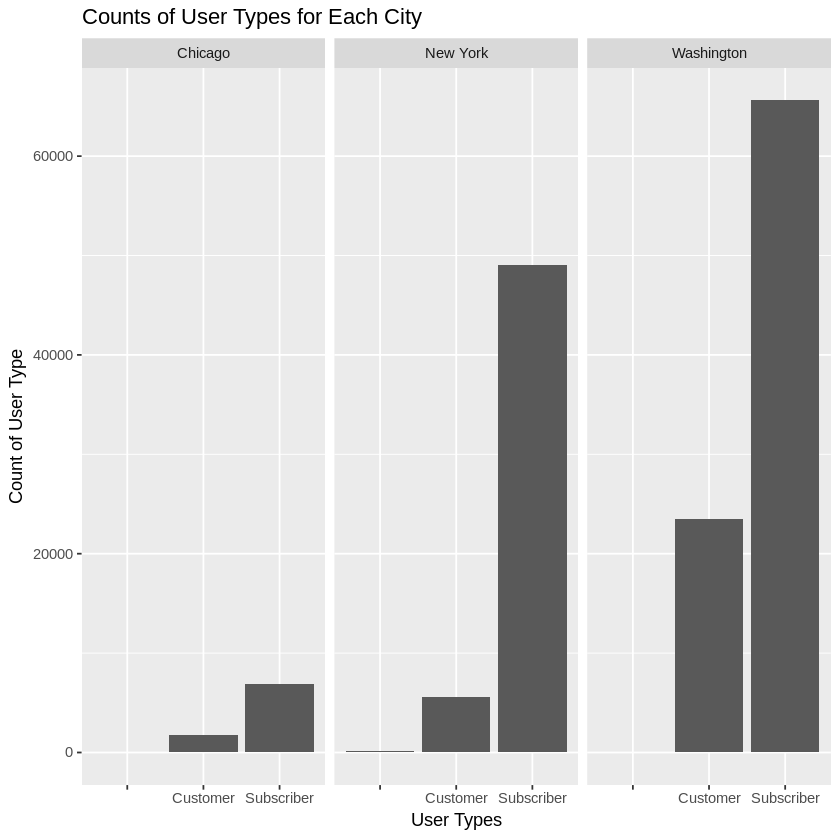

In [11]:
#plot of user type counts by city
library(ggplot2)
ggplot(data = cities, aes(User.Type)) + 
  geom_bar() +
  facet_wrap(~city, ncol = 3) + 
  ggtitle("Counts of User Types for Each City") + 
  xlab("User Types") + 
  ylab("Count of User Type")

**The counts for the user types are in the summary statistics above. The Subscriber user type was the most frequent in all cities**

### Question 2

**What is the most common start station?**

In [12]:
#function to get the most common start station
get.freq.SS <- function(p = wash, lab = " "){
  ss.p <- data.frame(table(p$Start.Station)) 
  p.freq <- ss.p[which.max(ss.p$Freq), ]
  p.freq[1, 1]
  print(lab)
  
  return(p.freq[1, 1])
}

In [13]:
#Most common start stations for each city
get.freq.SS(ny, "New York's most common Start Station")
get.freq.SS(wash, "Washington's most common Start Station")
get.freq.SS(chi, "Chicago's most common Start Station")

[1] "New York's most common Start Station"


[1] Pershing Square North
636 Levels:  1 Ave & E 16 St 1 Ave & E 18 St 1 Ave & E 30 St ... York St & Jay St

[1] "Washington's most common Start Station"


[1] Columbus Circle / Union Station
478 Levels:  10th & E St NW 10th & Florida Ave NW ... Yuma St & Tenley Circle NW

[1] "Chicago's most common Start Station"


[1] Streeter Dr & Grand Ave
472 Levels: 2112 W Peterson Ave 63rd St Beach ... Woodlawn Ave & Lake Park Ave

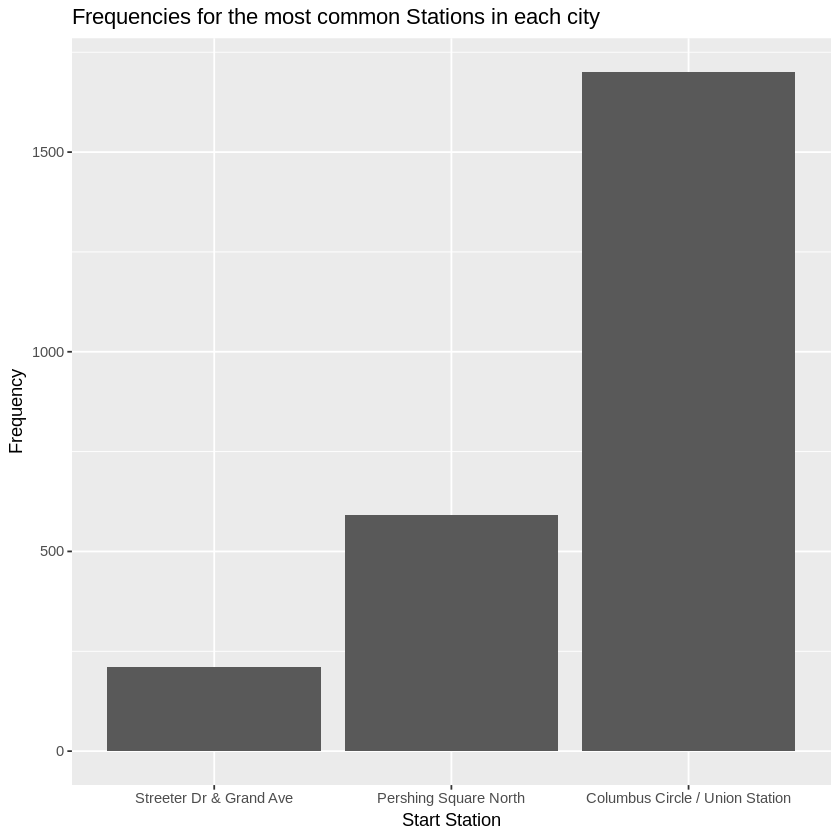

In [14]:
#subset cities dataset to only have rows for the most common start stations
cities2 <- subset(cities, Start.Station == "Streeter Dr & Grand Ave" | Start.Station == "Pershing Square North" | Start.Station == "Columbus Circle / Union Station")
#plot most common start stations
ggplot(data = cities2, aes(cities2$Start.Station))  + 
  geom_bar() + 
  ggtitle("Frequencies for the most common Stations in each city") + 
  xlab("Start Station") + 
  ylab("Frequency") 


**The most common start stations were Pershing Square North, Streeter Dr & Grand Ave and Columbus Circle/Union Station for New York, Chicago and Washington respectively.
  Columbus/Circle Union was the most frequently used overall.**

### Question 3

**What is the most common month?**

In [15]:
#create a new column for start Months derived from the start times 
library(magrittr)

cities$Months <- cities$Start.Time %>%
                  as.Date() %>%
                  months.Date()

In [16]:
#function to get the most common months
MostCommonMonth <- function(city = "Chicago" ,tt = " "){
  cities <- subset(cities, cities$city == city)
  df = data.frame(table(cities$Month)) 
  df[which.max(df$Freq), ]
  print(tt)
  return(df[which.max(df$Freq), ][1, 1])
}

MostCommonMonth(city = "New York", tt = "Most Common month in New York")
MostCommonMonth(city = "Washington", tt = "Most Common month in Washington")
MostCommonMonth(city = "Chicago", tt = "Most Common month in Chicago")

[1] "Most Common month in New York"


[1] June
Levels: April February January June March May

[1] "Most Common month in Washington"


[1] June
Levels: April February January June March May

[1] "Most Common month in Chicago"


[1] June
Levels: April February January June March May

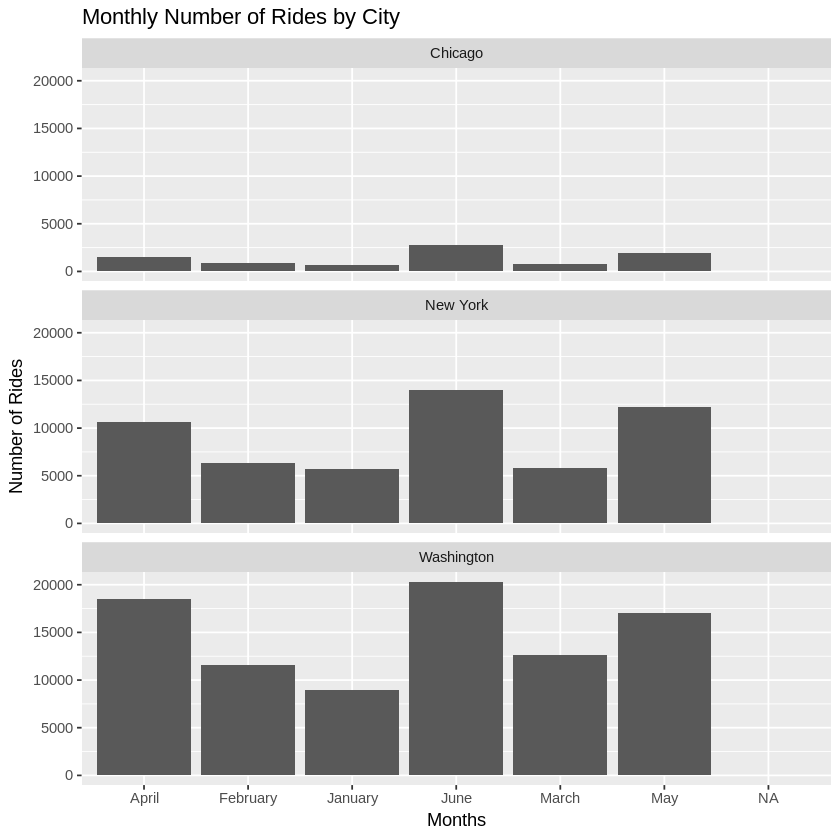

In [17]:
#a plot of frequencies of all months by city
ggplot(cities, aes(Months)) + 
  geom_bar() + 
  ggtitle("Monthly Number of Rides by City") +
  ylab("Number of Rides") +
  facet_wrap(~city, ncol = 1) 


**In all three cities, June was seen to be the month with the most rides**


## Finishing Up

> Congratulations!  You have reached the end of the Explore Bikeshare Data Project. You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the [rubric](https://review.udacity.com/#!/rubrics/2508/view). 


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [18]:
system('python -m nbconvert Explore_bikeshare_data.ipynb')